In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import Affine
from rasterio.enums import Resampling
import pandas as pd
from scipy.optimize import curve_fit
import scipy.stats

from cmcrameri import cm

In [105]:
df = pd.read_csv("/home/iganesh/Arecibo/ARCDR_alt_tess_all_rhocorr_int_cyc1_BSC.csv")
df = df[df.cyc1_DN > 0]
df = df[['FID', 'FID_ARCDR_', 'footprint', 'lat', 'lon', 'orbit',
       'pradius', 'rms_slope', 'xsize', 'ysize','ref_fresn', 'cyc1_BSC', 'name', 'jer_grp']]
print(len(df))

169760


In [106]:
print(df.columns)

Index(['FID', 'FID_ARCDR_', 'footprint', 'lat', 'lon', 'orbit', 'pradius',
       'rms_slope', 'xsize', 'ysize', 'ref_fresn', 'cyc1_BSC', 'name',
       'jer_grp'],
      dtype='object')


In [107]:
df_grp1  = df[df["jer_grp"] == 1]
df_grp2  = df[df["jer_grp"] == 2]
df_grp3  = df[df["jer_grp"] == 3]
df_grp4  = df[df["jer_grp"] == 4]
df_grp5  = df[df["jer_grp"] == 5]
df_grp67 = df[df["jer_grp"] == 0]

In [108]:
df_grp1.to_csv("grp1.csv")
df_grp2.to_csv("grp2.csv")
df_grp3.to_csv("grp3.csv")
df_grp5.to_csv("grp5.csv")
df_grp67.to_csv("grp67.csv")

In [109]:
#### Groups 1,2, AND 3
df_grp1_la = df_grp1[df_grp1.pradius <= 6053]
df_grp1_ma = df_grp1[(df_grp1.pradius > 6053) & (df_grp1.pradius <= 6057)]
df_grp1_ha = df_grp1[df_grp1.pradius > 6057]
print(len(df_grp1_la), len(df_grp1_ma), len(df_grp1_ha))

df_grp2_la = df_grp2[df_grp2.pradius <= 6053]
df_grp3_la = df_grp3[df_grp3.pradius <= 6053]
df_grp2_ha = df_grp2[df_grp2.pradius > 6053]
df_grp3_ha = df_grp3[df_grp3.pradius > 6053]

print("fresnel reflectivity")
print(df_grp1_la.ref_fresn.mean(), df_grp1_ma.ref_fresn.mean(), df_grp1_ha.ref_fresn.mean())
print(df_grp2_la.ref_fresn.mean(), df_grp2_ha.ref_fresn.mean())
print(df_grp3_la.ref_fresn.mean(), df_grp3_ha.ref_fresn.mean())

print("off-nadir BSC")
print(df_grp1_la.cyc1_BSC.mean(), df_grp1_ma.cyc1_BSC.mean(), df_grp1_ha.cyc1_BSC.mean())
print(df_grp2_la.cyc1_BSC.mean(), df_grp2_ha.cyc1_BSC.mean())
print(df_grp3_la.cyc1_BSC.mean(), df_grp3_ha.cyc1_BSC.mean())

2868 37003 117
fresnel reflectivity
0.12041387991631793 0.27083117969894294 0.19826660512820513
0.08302551842077675 0.19165916577878847
0.08526542128845446 0.09418619610490087
off-nadir BSC
-10.721746292015343 -8.739113926514047 -9.916530399145303
-14.762004187768337 -11.280118778942287
-11.555958590474154 -10.510760307274287


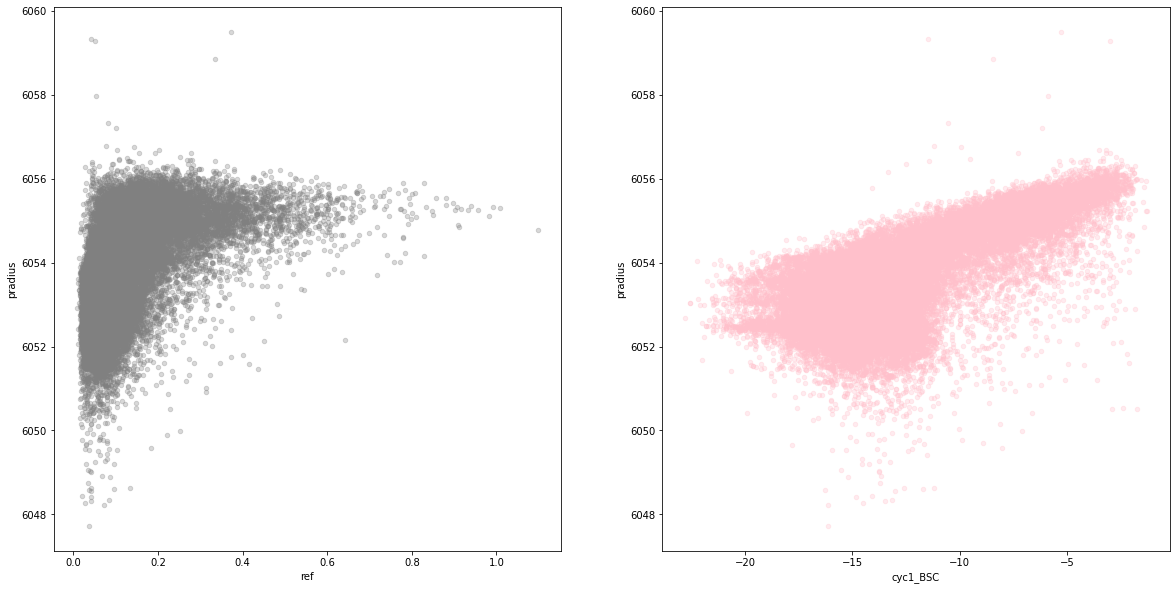

In [85]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))

# for key, grp in df.groupby(by="name"):
#     grp.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, )
# df_high_alt.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, c='brown')
df_grp2.plot.scatter(x = "ref", y= "pradius", ax=ax[0], c='grey', alpha = 0.3)
df_grp2.plot.scatter(x = "cyc1_BSC", y= "pradius", ax=ax[1], c='pink', alpha = 0.3)
plt.show()

In [88]:
## Group 5 and 6-7
df_grp5_la = df_grp2[df_grp2.pradius <= 6055]
df_grp5_ha = df_grp2[df_grp2.pradius > 6055]

print("fresnel reflectivity")
print(df_grp5_la.ref_fresn.mean(), df_grp5_ha.ref_fresn.mean())
print(df_grp67.ref_fresn.mean())

print("off-nadir BSC")
print(df_grp5_la.cyc1_BSC.mean(), df_grp5_ha.cyc1_BSC.mean())
print(df_grp67.cyc1_BSC.mean())

fresnel reflectivity
0.12191108643243942 0.3391638196877548
0.09288499959339494
off-nadir BSC
-13.537480797435075 -6.440397086922149
-11.383900392410093


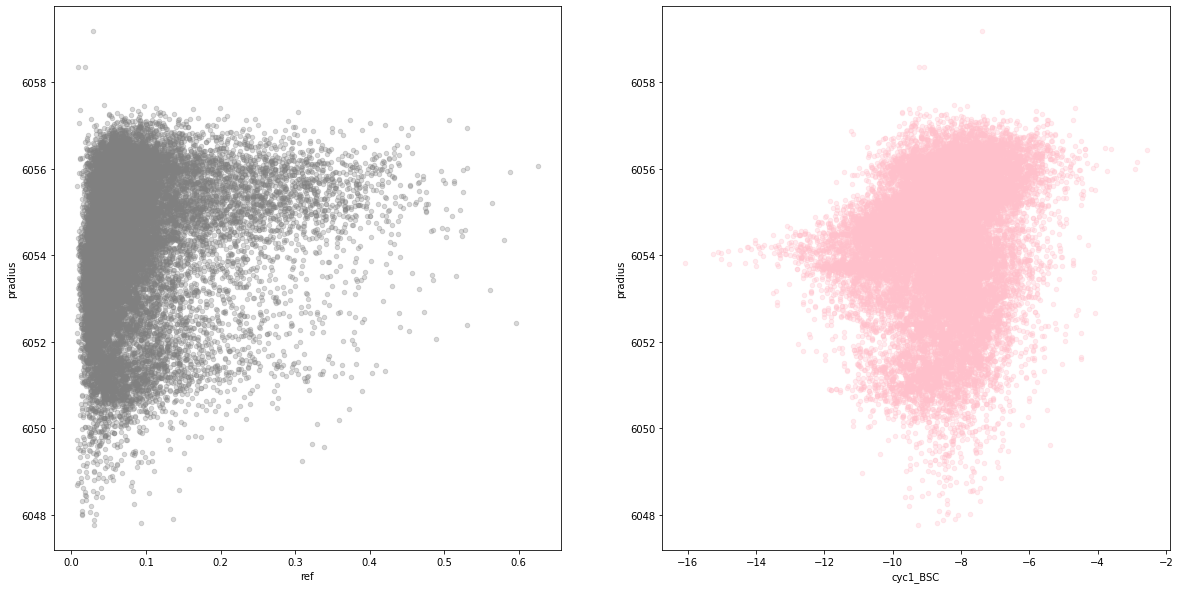

In [89]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))

# for key, grp in df.groupby(by="name"):
#     grp.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, )
# df_high_alt.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, c='brown')
df_grp5.plot.scatter(x = "ref", y= "pradius", ax=ax[0], c='grey', alpha = 0.3)
df_grp5.plot.scatter(x = "cyc1_BSC", y= "pradius", ax=ax[1], c='pink', alpha = 0.3)
plt.show()

In [102]:
df_grp1["categ"] = ""
for i in range(len(df_grp1)):
    row = df_grp1.iloc[i]
    if df_grp1.iloc[i].pradius <= 6053:
        

In [24]:
# df = df[['FID','FID_ARCDR_', 'lat', 'lon', 'pradius', 'rms_slope', 'ref_fresn', 'cyc1_BSC', 'jer_grp']]
# grp1  = df[df["jer_grp"] == 1].to_numpy()
# grp2  = df[df["jer_grp"] == 2].to_numpy()
# grp3  = df[df["jer_grp"] == 3].to_numpy()
# grp4  = df[df["jer_grp"] == 4].to_numpy()
# grp5  = df[df["jer_grp"] == 5].to_numpy()
# grp67 = df[df["jer_grp"] == 0].to_numpy()

[[ 1.31410000e+04  7.96990000e+04 -1.87347679e+01 ...  1.55800000e-01
  -2.94869700e+00  2.00000000e+00]
 [ 1.31660000e+04  7.96980000e+04 -1.86662121e+01 ...  1.98477000e-01
  -7.04690930e+00  2.00000000e+00]
 [ 1.31680000e+04  1.91400000e+03 -1.86635380e+01 ...  1.04665000e-01
  -5.85475440e+00  2.00000000e+00]
 ...
 [ 1.06926000e+05  1.05866000e+05  7.97399712e+00 ...  6.01084000e-02
  -1.73979100e+01  2.00000000e+00]
 [ 1.06927000e+05  3.18420000e+04  7.97747278e+00 ...  6.95479000e-02
  -1.73588000e+01  2.00000000e+00]
 [ 1.06932000e+05  1.46960000e+05  7.99064398e+00 ...  1.91441000e-01
  -1.73588940e+01  2.00000000e+00]]


In [14]:
print(df_new.ref, df_new.ref_corr)

0          0.215152
1          0.336293
2          0.199818
3          0.168030
4          0.183947
             ...   
4323136    0.167741
4323137    0.112266
4323138    0.104826
4323139    0.107007
4323140    0.111011
Name: ref, Length: 4291948, dtype: float64 0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
4323136    0.015270
4323137    0.024890
4323138    0.030188
4323139    0.036231
4323140    0.036763
Name: ref_corr, Length: 4291948, dtype: float64


In [7]:
df_new["ref_fresn"] = ref+ref_corr
print(len(df_new["ref_fresn"]))

4291948


/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
print(df_new.xsize.min(), df_new.ysize.min())

1.87520718574524 11.409536361694336


In [8]:
print(df_new["ref_fresn"] )

0          0.215152
1          0.336293
2          0.199818
3          0.168030
4          0.183947
             ...   
4323136    0.183011
4323137    0.137157
4323138    0.135014
4323139    0.143238
4323140    0.147774
Name: ref_fresn, Length: 4291948, dtype: float32


In [9]:
# df_new.to_csv("/home/iganesh/Arecibo/ARCDR_alt_fres_ref.csv")

In [42]:
print(len(df))
print(len(df.ref <= 0.0))
print(len(df.ref > 5.0))

4323143
4323143
4323143


In [44]:
df.ref >= 5

0          False
1          False
2          False
3          False
4          False
           ...  
4323138    False
4323139    False
4323140    False
4323141     True
4323142     True
Name: ref, Length: 4323143, dtype: bool

In [30]:
df_filt = df[(df["ref"]<=5)]
df_filt["ref_fresn"] = df_filt["ref"].to_numpy() + df_filt["ref_corr"].to_numpy()

/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
print(len(df.ref<0), len(df))
print(df_filt.ref_corr.min())
print(df_filt.ref_fresn.min())

4323143 4323143
-1.0148776769638062
-142586.734375


In [24]:
print(len(df[df["ref"]>1000]))

7478


In [17]:
df = pd.read_csv("/home/iganesh/Arecibo/arcdr_alt_tessera_cycle1_beta_themis_interior.csv")

In [18]:
df = df[df["ref"]<1.5]
df = df[df["NEAR_DIST"]>0]

### Classifying by reflectivity and backscatter; comparing distance from boundaries of tesserae

In [19]:
df_class = df.groupby(by="categ_cen")
print(df_class["NEAR_DIST"].min())

categ_cen
ha_highref_highbsc    8240.328700
ha_highref_lowbsc     8608.430141
ha_lowref_highbsc     8857.588973
ha_lowref_lowbsc      8361.135185
la_highref_highbsc    7228.834719
la_highref_lowbsc     6359.822787
la_lowref_highbsc     7414.312701
la_lowref_lowbsc      6495.242733
Name: NEAR_DIST, dtype: float64


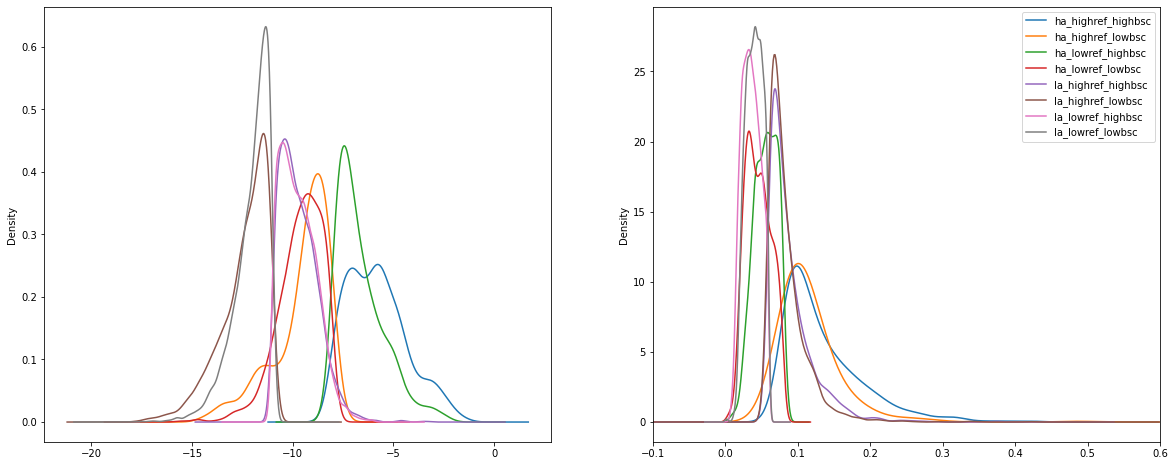

In [26]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)
for key, grp in df_class:
    grp["C1BSC_cen"].plot(kind='kde', ax= ax[0], label=key)
    grp["ref"].plot(kind='kde', ax= ax[1], label=key)
  
ax[1].set_xlim(-0.1, 0.6)   
plt.legend()
plt.show()

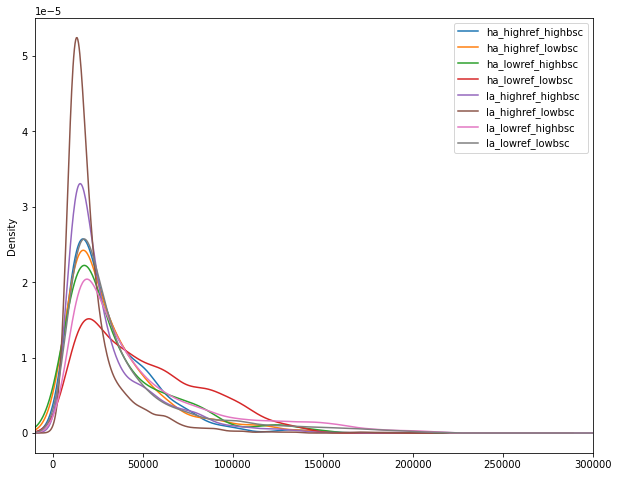

In [20]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 8)
for key, grp in df_class:
    grp["NEAR_DIST"].plot(kind='kde', ax= ax, label=key)
  
ax.set_xlim(-10000, 300000)   
plt.legend()
plt.show()

### classifying if within parabola or outside and performing ks test

In [21]:
df_low_alt = df[df["pradius"]<=6054]
df_in = df_low_alt[df_low_alt["in_para"] == 1]
df_out = df_low_alt[df_low_alt["in_para"] == 0]

In [22]:
scipy.stats.ks_2samp(df_in["ref"], df_out["ref"])

KstestResult(statistic=0.1550080003537272, pvalue=4.9044860434940135e-171)

In [23]:
print(df_in["ref"].mean(), df_out["ref"].mean())
print(df_in["ref"].std(), df_out["ref"].std())

0.06324996111391108 0.0540301678512166
0.03372394821413461 0.02914865423345484


In [24]:
print(df_in["cycle1_BSC"].mean(), df_out["cycle1_BSC"].mean())
print(df_in["cycle1_BSC"].std(), df_out["cycle1_BSC"].std())

-11.125040425021195 -11.138532146449148
3.0789797661952014 2.8079647691503697


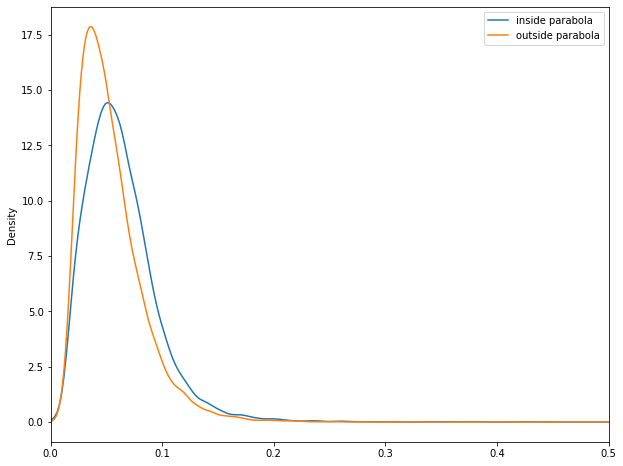

In [25]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 8)

df_in["ref"].plot(kind='kde', ax= ax, label="inside parabola")
df_out["ref"].plot(kind='kde', ax= ax, label="outside parabola")
  
ax.set_xlim(0, 0.5)   
plt.legend()
plt.show()

In [4]:
df_low_alt = df[df["pradius"]<=6054]
df_high_alt = df[df["pradius"]>6054]

In [6]:
print(df_low_alt.ref.mean(), df_high_alt.ref.mean())
print(df_low_alt.C1BSC_cen.mean(), df_high_alt.C1BSC_cen.mean())

0.05850884278033579 0.08360940383998862
-11.141168833823897 -8.294235765436591


In [7]:
a = df_low_alt[(df["ref"]>0.06) & (df["cycle1_BSC"]>-11)]
b = df_low_alt[(df["ref"]<=0.06) & (df["cycle1_BSC"]>-11)]
c = df_low_alt[(df["ref"]<=0.06) & (df["cycle1_BSC"]<=-11)]
d = df_low_alt[(df["ref"]>0.06) & (df["cycle1_BSC"]<=-11)]

/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [8]:
ha = df_high_alt[(df["ref"]>0.08) & (df["cycle1_BSC"]>-8)]
hb = df_high_alt[(df["ref"]<=0.08) & (df["cycle1_BSC"]>-8)]
hc = df_high_alt[(df["ref"]<=0.08) & (df["cycle1_BSC"]<=-8)]
hd = df_high_alt[(df["ref"]>0.08) & (df["cycle1_BSC"]<=-8)]

/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [33]:
df_high_alt.cycle1_BSC.mean()

-8.264919001740378

In [34]:
df_tess = df.groupby(by="name")

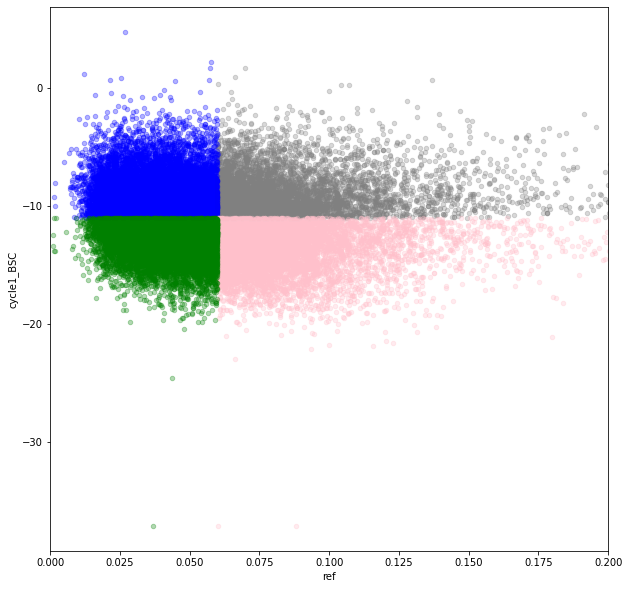

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))

# for key, grp in df.groupby(by="name"):
#     grp.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, )
# df_high_alt.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, c='brown')
a.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, c='grey', alpha = 0.3)
b.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, c='blue', alpha = 0.3)
d.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, c='pink', alpha = 0.3)
c.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, c='green', alpha = 0.3)
ax.set_xlim(0, 0.2)
plt.show()

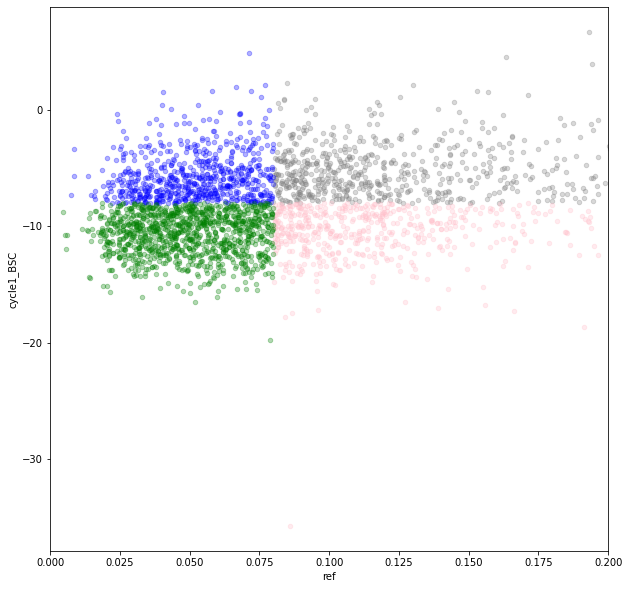

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))

# for key, grp in df.groupby(by="name"):
#     grp.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, )
# df_high_alt.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, c='brown')
ha.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, c='grey', alpha = 0.3)
hb.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, c='blue', alpha = 0.3)
hd.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, c='pink', alpha = 0.3)
hc.plot.scatter(x = "ref", y= "cycle1_BSC", ax=ax, c='green', alpha = 0.3)
ax.set_xlim(0, 0.2)
plt.show()

In [26]:
a.to_csv("highrefhighbsc.csv")
b.to_csv("lowrefhighbsc.csv")
c.to_csv("lowreflowbsc.csv")
d.to_csv("highreflowbsc.csv")

In [37]:
ha.to_csv("ha_highrefhighbsc_BT.csv")
hb.to_csv("ha_lowrefhighbsc_BT.csv")
hc.to_csv("ha_lowreflowbsc_BT.csv")
hd.to_csv("ha_highreflowbsc_BT.csv")

In [41]:
def tiff2numpy(file):
    inds = rasterio.open(file)
    data = inds.read(1)
    inds.close()
    return data.astype(np.float32)

def resample(infile, height_scale_factor, width_scale_factor):
   
    with rasterio.open(infile) as dataset:

    # resample data to target shape
        data = dataset.read(
            out_shape=(
                dataset.count,
                int(dataset.height * height_scale_factor),
                int(dataset.width * width_scale_factor)
            ),
            resampling=Resampling.bilinear
        )

        # scale image transform
        transform = dataset.transform * dataset.transform.scale(
            (dataset.width / data.shape[-1]),
            (dataset.height / data.shape[-2])
        )        
        return data[0]

In [53]:
bscfile = "Sudenitsa_BSC_cycle1_225m.tif"
reffile = "Sudenitsa_ref_geoCRS.tif"
binfile = "Sudenitsa_binary_reclass_geoCRS.tif"

In [54]:
bsc = tiff2numpy(bscfile)
ref = tiff2numpy(reffile)
binary = tiff2numpy(binfile)

In [55]:
ht_scale = ref.shape[0]/bsc.shape[0]
wid_scale = ref.shape[1]/bsc.shape[1]

print(ht_scale, wid_scale)
bsc_r = resample(bscfile, ht_scale, wid_scale)

ht_scale = ref.shape[0]/binary.shape[0]
wid_scale = ref.shape[1]/binary.shape[1]
bin_r = resample(binfile, ht_scale, wid_scale)

0.04858839209984248 0.04851447912749154


In [56]:
print(bsc_r.shape, ref.shape, bin_r.shape)

(401, 1161) (401, 1161) (401, 1161)


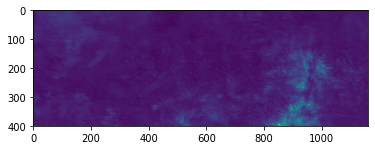

In [57]:
plt.imshow(ref)

In [58]:
bsc_sud = bsc_r[np.where(bin_r>0)]
ref_sud = ref[np.where(bin_r>0)]

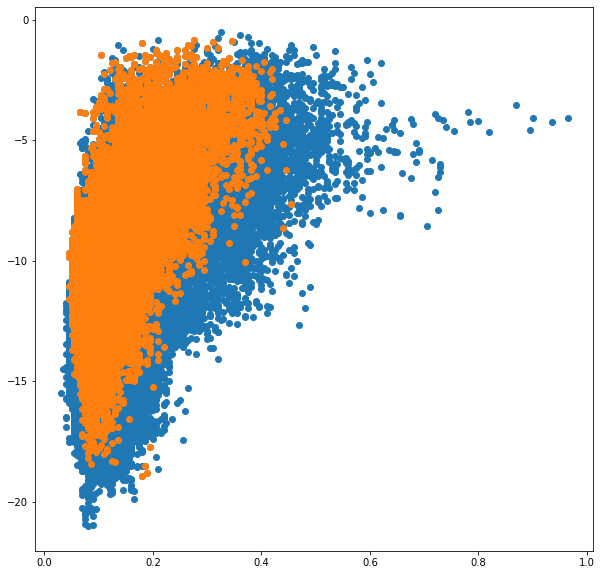

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 10)

ax.scatter(ref, bsc_r)
ax.scatter(ref_sud, bsc_sud)

In [51]:
np.square((3**0.5-1)/(3**0.5+1))

0.07179676972449082